In [1]:
from imports import *
import multicolorfits as mcf
%matplotlib inline 

multicolorfits: kapteyn package required for some options in task reproject2D()


In [2]:
def get_rgb(data_r, data_g, data_b, data_b1, 
            min_max_r=[0.1,99.99], min_max_g=[0.1,99.99], min_max_b=[0.1,99.99], min_max_b1=[97, 99.5],
            gamma_r=2.0, gamma_g=2.0, gamma_b=2.0, gamma_b1=2.0, gamma_rgb=2.2): 

    data_r = data_r.copy()
    data_g = data_g.copy()
    data_b = data_b.copy()
    data_b1 = data_b1.copy()

    data_r[data_r < 0] = 0
    data_g[data_g < 0] = 0
    data_b[data_b < 0] = 0
    data_b1[data_b1<0] = 0

    data_r = mcf.greyRGBize_image(data_r, rescalefn='asinh', gamma=gamma_r, scaletype='perc', min_max=min_max_r) 
    data_g = mcf.greyRGBize_image(data_g, rescalefn='asinh', gamma=gamma_g, scaletype='perc', min_max=min_max_g) 
    data_b = mcf.greyRGBize_image(data_b, rescalefn='asinh', gamma=gamma_b, scaletype='perc', min_max=min_max_b)
    data_b1 = mcf.greyRGBize_image(data_b1, rescalefn='asinh', gamma=gamma_b1, scaletype='perc', min_max=min_max_b1)

    # data_r = mcf.colorize_image(data_r, '#994242', colorintype='hex', gammacorr_color=2.2)
    # data_g = mcf.colorize_image(data_g, '#FFF9DB', colorintype='hex', gammacorr_color=2.2)
    # data_b = mcf.colorize_image(data_b, '#1773E9', colorintype='hex', gammacorr_color=2.2)
    # data_b1 =  mcf.colorize_image(data_b1, '#1773E9', colorintype='hex', gammacorr_color=2.2)

    data_r = mcf.colorize_image(data_r, '#FF0000', colorintype='hex', gammacorr_color=2.2)
    data_g = mcf.colorize_image(data_g, '#00FF00', colorintype='hex', gammacorr_color=2.2)
    data_b = mcf.colorize_image(data_b, '#0000FF', colorintype='hex', gammacorr_color=2.2)
    data_b1 =  mcf.colorize_image(data_b1, '#1773E9', colorintype='hex', gammacorr_color=1)

    data_rgb = mcf.combine_multicolor([data_r, data_g, data_b, data_b1], gamma=gamma_rgb, inverse=False)
    data_rgb = (data_rgb*255).astype(np.uint8)

    return(data_rgb)

In [3]:
root_dir = '/Users/abarnes/Dropbox/work/Smallprojects/galaxies'

file_mus = '%s/data_hstha/ngc1566/muse/NGC1566-0.80asec_MAPS.fits' %root_dir 
file_hst = '%s/data_hstha/ngc1566/hst_contsub/ngc1566_hst_ha.fits' %root_dir 
file_hstcat = '%s/data_hstha_nebulae_catalogue/ngc1566/catalogue/ngc1566_mask.fits' %root_dir 
file_hstcpx = '%s/data_hstha_nebulae_catalogue/ngc1566/catalogue/ngc1566_complexity.fits' %root_dir 
# file_muscat = '%s/data_hstha/ngc1566/muse/NGC1566_nebmask.fits' %root_dir 
file_muscat = '%s/data_hstha/ngc1566/muse/NGC1566_nebmask_regrid.fits' %root_dir 

file_jwst = '%s/data_hstha/ngc1566/jwst/ngc1566_nircam_lv3_f300m_i2d_anchor.fits' %root_dir 
file_jwst_png = '%s/data_hstha/ngc1566/rgb/jwst_rotated.png' %root_dir
file_hst_png = '%s/data_hstha/ngc1566/rgb/hst_rotated.png' %root_dir

hdu_mus = fits.open(file_mus)['HA6562_FLUX']
hdu_hst = fits.open(file_hst)[0]
hdu_hstcat = fits.open(file_hstcat)[0]
# hdu_muscat = fits.open(file_muscat)[0]
hdu_hstcpx = fits.open(file_hstcpx)[0]

hdu_jwst = fits.open(file_jwst)[1]

hdu_hstcat_masked = fits.open(file_hstcat)[0]
hdu_muscat_masked = fits.open(file_muscat)[0]

hdu_hstcat_masked.data = np.array(hdu_hstcat_masked.data, dtype=float)
hdu_muscat_masked.data = np.array(hdu_muscat_masked.data, dtype=float)

# hdu_hstcat_masked.data[hdu_hstcat_masked.data==-1] = np.nan
# hdu_muscat_masked.data[hdu_muscat_masked.data==-1] = np.nan

hdu_muscat = hdu_muscat_masked.copy()
hdu_muscat.data[np.isnan(hdu_muscat.data)] = -1

# Convert to units of 1e-15 erg/s/cm2/arcsec2
hdu_mus.data = hdu_mus.data * (1/(hdu_mus.header['CD2_2']*3600)**2)
hdu_hst.data = hdu_hst.data * (1/(hdu_hst.header['CD2_2']*3600)**2)
hdu_mus.data = hdu_mus.data / 1e5
hdu_hst.data = hdu_hst.data / 1e5

hdu_hst_f275w = fits.open('%s/data_hstha/ngc1566/hst/ngc1566_uvis_f275w_exp_drc_sci.fits' %root_dir)[0]
hdu_hst_f336w = fits.open('%s/data_hstha/ngc1566/hst/ngc1566_uvis_f336w_exp_drc_sci.fits' %root_dir)[0]
hdu_hst_f438w = fits.open('%s/data_hstha/ngc1566/hst/ngc1566_uvis_f438w_exp_drc_sci.fits' %root_dir)[0]
hdu_hst_f555w = fits.open('%s/data_hstha/ngc1566/hst/ngc1566_uvis_f555w_exp_drc_sci.fits' %root_dir)[0]
hdu_hst_f814w = fits.open('%s/data_hstha/ngc1566/hst/ngc1566_uvis_f814w_exp_drc_sci.fits' %root_dir)[0]

association_mask_file_nuv_32pc = '%s/data_misc/multiscale_stellar_associations/ngc1566/nuvselect/ws32pc/PHANGS_IR4_hst_wfc3_ngc1566_v1p3_multi_assoc-nuvselect-ws32pc-idmask.fits' %(root_dir)
cat_misc.get_unpack(association_mask_file_nuv_32pc)
hdu_hst_asscat = fits.open(association_mask_file_nuv_32pc)[0]

File found: /Users/abarnes/Dropbox/work/Smallprojects/galaxies/data_misc/multiscale_stellar_associations/ngc1566/nuvselect/ws32pc/PHANGS_IR4_hst_wfc3_ngc1566_v1p3_multi_assoc-nuvselect-ws32pc-idmask.fits


In [4]:
regions_file = './regs/nebs_simple.reg'
centres_x, centres_y, widths, heights, n = get_regions(regions_file)
n = len(centres_x)

hdu_mus_crop = []
hdu_hst_crop = []
hdu_muscat_crop = []
hdu_hstcat_crop = []
hdu_hstcpx_crop = []
hdu_hst_f275w_crop = []
hdu_hst_f336w_crop = []
hdu_hst_f438w_crop = []
hdu_hst_f555w_crop = []
hdu_hst_f814w_crop = []
hdu_hst_asscat_crop = []

for i, (centre_x, centre_y, width, height) in enumerate(zip(centres_x, centres_y, widths, heights)):

    hdu_mus_crop += [get_croppeddata(hdu_mus, centre_x, centre_y, width, height)]
    hdu_hst_crop += [get_croppeddata(hdu_hst, centre_x, centre_y, width, height)]
    hdu_muscat_crop += [get_croppeddata(hdu_muscat, centre_x, centre_y, width, height)]
    hdu_hstcat_crop += [get_croppeddata(hdu_hstcat, centre_x, centre_y, width, height)]
    hdu_hstcpx_crop += [get_croppeddata(hdu_hstcpx, centre_x, centre_y, width, height)]
    hdu_hst_f275w_crop += [get_croppeddata(hdu_hst_f275w, centre_x, centre_y, width, height)]
    hdu_hst_f336w_crop += [get_croppeddata(hdu_hst_f336w, centre_x, centre_y, width, height)]
    hdu_hst_f438w_crop += [get_croppeddata(hdu_hst_f438w, centre_x, centre_y, width, height)]
    hdu_hst_f555w_crop += [get_croppeddata(hdu_hst_f555w, centre_x, centre_y, width, height)]
    hdu_hst_f814w_crop += [get_croppeddata(hdu_hst_f814w, centre_x, centre_y, width, height)]
    hdu_hst_asscat_crop += [get_croppeddata(hdu_hst_asscat, centre_x, centre_y, width, height)]

[INFO] [get_regions] Opening regions file (this may take a min)... 
[INFO] [get_regions] Getting info for 4 regions...


In [5]:
# Deinfe colours
cmap1 = plt.cm.binary(np.linspace(0, 1, 32))
cmap2 = colorcet.cm.fire(np.linspace(0, 1, 128))
cmaplist = np.vstack((cmap1, cmap2))
cmap_map = mpl.colors.LinearSegmentedColormap.from_list('my_colormap', cmaplist)
cmap_map.set_under(cmap_map(0))
cmap_map.set_bad(color=cmap_map(0))

# Deinfe colours
cmap_cat = plt.get_cmap('turbo')
cmap_cat.set_under('lightgrey')
cmap_cat.set_bad('lightgrey')

# Deinfe colours
cmap_cpx = plt.get_cmap('viridis', 5)
cmap_cpx.set_under('lightgrey')
cmap_cpx.set_bad('lightgrey')

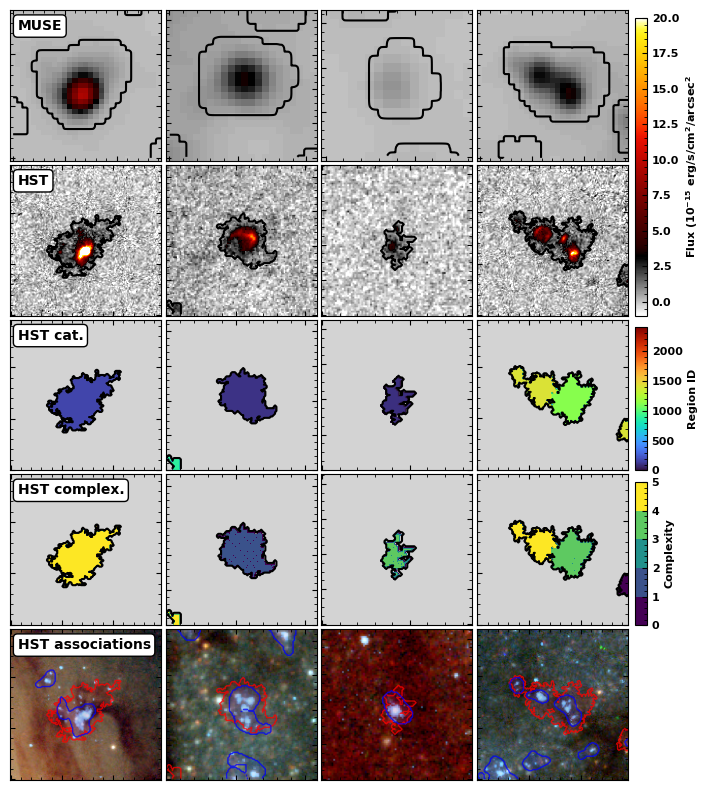

finished running


In [6]:
fig = plt.figure(figsize=(9, 10)) 
fig.subplots_adjust(wspace=-0.325, hspace=0.025)

for i in range(len(hdu_mus_crop)):
    
    data_rgb = get_rgb(data_r = hdu_hst_f814w_crop[i].data,
                        data_g = hdu_hst_f555w_crop[i].data,
                        data_b = hdu_hst_f438w_crop[i].data,
                        data_b1 = hdu_hst_f336w_crop[i].data)

    centre_x = centres_x[i]
    centre_y = centres_y[i]
    width = widths[i]
    height = heights[i]

    j = i+1

    ax1 = fig.add_subplot(5,n,j)
    ax2 = fig.add_subplot(5,n,j+n)
    ax3 = fig.add_subplot(5,n,j+(2*n))
    ax4 = fig.add_subplot(5,n,j+(3*n))
    ax5 = fig.add_subplot(5,n,j+(4*n))

    vmin1, vmax1 = np.nanpercentile(hdu_mus.data, [1, 99.95])
    vmin3, vmax3 = np.nanpercentile(hdu_muscat.data, [0,100])
    vmin5, vmax5 = np.nanpercentile(hdu_hstcpx_crop[i].data, [0,100])

    ax1.contour(hdu_muscat_crop[i].data, [0], origin='lower', colors='black', linewidths=1.5, extent=[0, hdu_mus_crop[i].data.shape[0], 0, hdu_mus_crop[i].data.shape[1]])
    ax2.contour(hdu_hstcat_crop[i].data, [0], origin='lower', colors='black', linewidths=1.5)
    ax3.contour(hdu_hstcat_crop[i].data, [0], origin='lower', colors='black', linewidths=1.5)
    ax4.contour(hdu_hstcat_crop[i].data, [0], origin='lower', colors='black', linewidths=1.5)

    ax5.contourf(hdu_hstcat_crop[i].data, [0, 1e5], origin='lower', colors='red', linewidths=0, alpha=0.1)
    ax5.contour(hdu_hstcat_crop[i].data, [0], origin='lower', colors='red', linewidths=1, alpha=0.75)
    ax5.contourf(hdu_hst_asscat_crop[i].data, [1, 1e5], origin='lower', colors='blue', linewidths=0, alpha=0.1)
    ax5.contour(hdu_hst_asscat_crop[i].data, [-1], origin='lower', colors='blue', linewidths=1, alpha=0.75)

    im1 = ax1.imshow(hdu_mus_crop[i].data, cmap=cmap_map, vmin=-1, vmax=20, origin='lower')
    im2 = ax2.imshow(hdu_hst_crop[i].data, cmap=cmap_map, vmin=-1, vmax=20, origin='lower')
    im3 = ax3.imshow(hdu_hstcat_crop[i].data, cmap=cmap_cat, vmin=0, vmax=vmax3, origin='lower')
    im4 = ax4.imshow(hdu_hstcpx_crop[i].data, cmap=cmap_cpx, vmin=0, vmax=5, origin='lower')
    im5 = ax5.imshow(data_rgb, origin='lower')

    for ax in [ax1, ax2, ax3, ax4, ax5]: 

        ax.set_xticklabels([])
        ax.set_yticklabels([])

    if i == 0:
        ax1.text(0.05, 0.94, 'MUSE', transform=ax1.transAxes, color='black', bbox=dict(facecolor='white', boxstyle='round', alpha=1), size=10, ha='left', va='top')
        ax2.text(0.05, 0.94, 'HST', transform=ax2.transAxes, color='black', bbox=dict(facecolor='white', boxstyle='round', alpha=1), size=10, ha='left', va='top')
        ax3.text(0.05, 0.94, 'HST cat.', transform=ax3.transAxes, color='black', bbox=dict(facecolor='white', boxstyle='round', alpha=1), size=10, ha='left', va='top')
        ax4.text(0.05, 0.94, 'HST complex.', transform=ax4.transAxes, color='black', bbox=dict(facecolor='white', boxstyle='round', alpha=1), size=10, ha='left', va='top')
        ax5.text(0.05, 0.94, 'HST associations', transform=ax5.transAxes, color='black', bbox=dict(facecolor='white', boxstyle='round', alpha=1), size=10, ha='left', va='top')

    if i == n-1: 

        pos1 = ax1.get_position()
        pos2 = ax2.get_position()
        cax = fig.add_axes([pos2.x1+pos2.width*0.05, pos2.y0, pos2.width*0.075, pos1.y1-pos2.y0-pos2.height*0.05])
        cbar = fig.colorbar(im1, cax=cax, orientation='vertical')
        cbar.set_label('Flux ($10^{-15}$ erg/s/cm$^2$/arcsec$^2$', fontsize=8)
        cbar.ax.tick_params(axis='both', which='major', labelsize=8)

        pos = ax3.get_position()
        cax = fig.add_axes([pos.x1+pos.width*0.05, pos.y0, pos.width*0.075, pos.height-pos.height*0.05])
        cbar = fig.colorbar(im3, cax=cax, orientation='vertical')
        cbar.set_label('Region ID', fontsize=8)
        cbar.ax.tick_params(axis='both', which='major', labelsize=8)

        pos = ax4.get_position()
        cax = fig.add_axes([pos.x1+pos.width*0.05, pos.y0, pos.width*0.075, pos.height-pos.height*0.05])
        cbar = fig.colorbar(im4, cax=cax, orientation='vertical')
        cbar.set_label('Complexity', fontsize=8)
        cbar.ax.tick_params(axis='both', which='major', labelsize=8)
        
plt.show()
print('finished running')

finished running


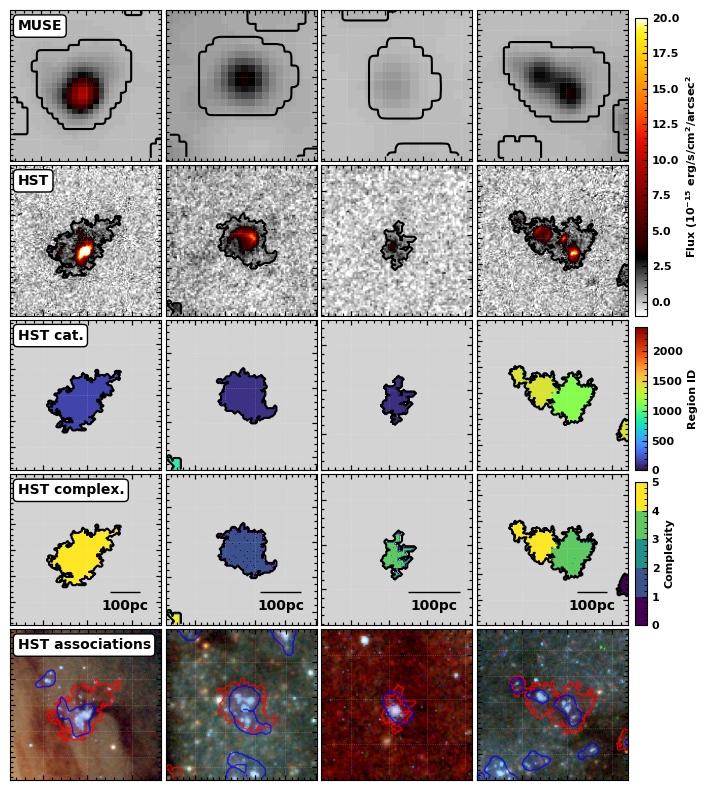

In [7]:
fig = plt.figure(figsize=(9, 10)) 
fig.subplots_adjust(wspace=-0.325, hspace=0.025)

for i in range(len(hdu_mus_crop)):

    data_rgb = get_rgb(data_r = hdu_hst_f814w_crop[i].data,
                    data_g = hdu_hst_f555w_crop[i].data,
                    data_b = hdu_hst_f438w_crop[i].data,
                    data_b1 = hdu_hst_f336w_crop[i].data)


    centre_x = centres_x[i]
    centre_y = centres_y[i]
    width = widths[i]
    height = heights[i]

    j = i+1

    ax1 = fig.add_subplot(5,n,j, projection=WCS(hdu_mus_crop[i].header))
    ax2 = fig.add_subplot(5,n,j+n, projection=WCS(hdu_hst_crop[i].header))
    ax3 = fig.add_subplot(5,n,j+(2*n), projection=WCS(hdu_hstcat_crop[i].header))
    ax4 = fig.add_subplot(5,n,j+(3*n), projection=WCS(hdu_hstcpx_crop[i].header))
    ax5 = fig.add_subplot(5,n,j+(4*n), projection=WCS(hdu_hst_f814w_crop[i].header))

    vmin1, vmax1 = np.nanpercentile(hdu_mus.data, [1, 99.95])
    vmin3, vmax3 = np.nanpercentile(hdu_muscat.data, [0,100])
    vmin5, vmax5 = np.nanpercentile(hdu_hstcpx_crop[i].data, [0,100])

    ax1.contour(hdu_muscat_crop[i].data, [0], origin='lower', colors='black', linewidths=1.5, extent=[0, hdu_mus_crop[i].data.shape[0], 0, hdu_mus_crop[i].data.shape[1]])
    ax2.contour(hdu_hstcat_crop[i].data, [0], origin='lower', colors='black', linewidths=1.5)
    ax3.contour(hdu_hstcat_crop[i].data, [0], origin='lower', colors='black', linewidths=1.5)
    ax4.contour(hdu_hstcat_crop[i].data, [0], origin='lower', colors='black', linewidths=1.5)

    ax5.contourf(hdu_hstcat_crop[i].data, [0, 1e5], origin='lower', colors='red', linewidths=0, alpha=0.1)
    ax5.contour(hdu_hstcat_crop[i].data, [0], origin='lower', colors='red', linewidths=1, alpha=0.75)
    ax5.contourf(hdu_hst_asscat_crop[i].data, [1, 1e5], origin='lower', colors='blue', linewidths=0, alpha=0.1)
    ax5.contour(hdu_hst_asscat_crop[i].data, [-1], origin='lower', colors='blue', linewidths=1, alpha=0.75)

    im1 = ax1.imshow(hdu_mus_crop[i].data, cmap=cmap_map, vmin=-1, vmax=20, origin='lower')
    im2 = ax2.imshow(hdu_hst_crop[i].data, cmap=cmap_map, vmin=-1, vmax=20, origin='lower')
    im3 = ax3.imshow(hdu_hstcat_crop[i].data, cmap=cmap_cat, vmin=0, vmax=vmax3, origin='lower')
    im4 = ax4.imshow(hdu_hstcpx_crop[i].data, cmap=cmap_cpx, vmin=0, vmax=5, origin='lower')
    im5 = ax5.imshow(data_rgb, origin='lower')

    for ax in [ax1, ax2, ax3, ax4, ax5]: 

        ax.set_xticklabels([])
        ax.set_yticklabels([])

        ax.tick_params(axis='x', which='both', bottom=True, top=True, left=True, right=True)
        ax.tick_params(axis='y', which='both', bottom=True, top=True, left=True, right=True)
        ax.tick_params(axis='x', labelbottom=False, labelleft=False, labelright=False, labeltop=False)
        ax.tick_params(axis='y', labelbottom=False, labelleft=False, labelright=False, labeltop=False)
        ax.grid(True, color='white', linestyle=':', linewidth=0.5, alpha=0.3)

        ra = ax.coords[0]
        dec = ax.coords[1]

        ra.display_minor_ticks(True)
        dec.display_minor_ticks(True)

    if i == 0:
        ax1.text(0.05, 0.94, 'MUSE', transform=ax1.transAxes, color='black', bbox=dict(facecolor='white', boxstyle='round', alpha=1), size=10, ha='left', va='top')
        ax2.text(0.05, 0.94, 'HST', transform=ax2.transAxes, color='black', bbox=dict(facecolor='white', boxstyle='round', alpha=1), size=10, ha='left', va='top')
        ax3.text(0.05, 0.94, 'HST cat.', transform=ax3.transAxes, color='black', bbox=dict(facecolor='white', boxstyle='round', alpha=1), size=10, ha='left', va='top')
        ax4.text(0.05, 0.94, 'HST complex.', transform=ax4.transAxes, color='black', bbox=dict(facecolor='white', boxstyle='round', alpha=1), size=10, ha='left', va='top')
        ax5.text(0.05, 0.94, 'HST associations', transform=ax5.transAxes, color='black', bbox=dict(facecolor='white', boxstyle='round', alpha=1), size=10, ha='left', va='top')

    wcsaxes.add_scalebar(ax4, (100/(17.7e6/206265)*u.arcsec).to('deg'), corner='bottom right', label='100pc')

    if i == n-1: 

        pos1 = ax1.get_position()
        pos2 = ax2.get_position()
        cax = fig.add_axes([pos2.x1+pos2.width*0.05, pos2.y0, pos2.width*0.075, pos1.y1-pos2.y0-pos2.height*0.05])
        cbar = fig.colorbar(im1, cax=cax, orientation='vertical')
        cbar.set_label('Flux ($10^{-15}$ erg/s/cm$^2$/arcsec$^2$', fontsize=8)
        cbar.ax.tick_params(axis='both', which='major', labelsize=8)

        pos = ax3.get_position()
        cax = fig.add_axes([pos.x1+pos.width*0.05, pos.y0, pos.width*0.075, pos.height-pos.height*0.05])
        cbar = fig.colorbar(im3, cax=cax, orientation='vertical')
        cbar.set_label('Region ID', fontsize=8)
        cbar.ax.tick_params(axis='both', which='major', labelsize=8)

        pos = ax4.get_position()
        cax = fig.add_axes([pos.x1+pos.width*0.05, pos.y0, pos.width*0.075, pos.height-pos.height*0.05])
        cbar = fig.colorbar(im4, cax=cax, orientation='vertical')
        cbar.set_label('Complexity', fontsize=8)
        cbar.ax.tick_params(axis='both', which='major', labelsize=8)
        
        
print('finished running')
plt.savefig('./figs/maps_hstmuse_ngc1566_zoom_simple.pdf', dpi=150, bbox_inches='tight', transparent=True)

In [8]:
regions_file = './regs/nebs_complex.reg'
centres_x, centres_y, widths, heights, n = get_regions(regions_file)
n = len(centres_x)

hdu_mus_crop = []
hdu_hst_crop = []
hdu_muscat_crop = []
hdu_hstcat_crop = []
hdu_hstcpx_crop = []
hdu_hst_f275w_crop = []
hdu_hst_f336w_crop = []
hdu_hst_f438w_crop = []
hdu_hst_f555w_crop = []
hdu_hst_f814w_crop = []
hdu_hst_asscat_crop = []

for i, (centre_x, centre_y, width, height) in enumerate(zip(centres_x, centres_y, widths, heights)):

    hdu_mus_crop += [get_croppeddata(hdu_mus, centre_x, centre_y, width, height)]
    hdu_hst_crop += [get_croppeddata(hdu_hst, centre_x, centre_y, width, height)]
    hdu_muscat_crop += [get_croppeddata(hdu_muscat, centre_x, centre_y, width, height)]
    hdu_hstcat_crop += [get_croppeddata(hdu_hstcat, centre_x, centre_y, width, height)]
    hdu_hstcpx_crop += [get_croppeddata(hdu_hstcpx, centre_x, centre_y, width, height)]
    hdu_hst_f275w_crop += [get_croppeddata(hdu_hst_f275w, centre_x, centre_y, width, height)]
    hdu_hst_f336w_crop += [get_croppeddata(hdu_hst_f336w, centre_x, centre_y, width, height)]
    hdu_hst_f438w_crop += [get_croppeddata(hdu_hst_f438w, centre_x, centre_y, width, height)]
    hdu_hst_f555w_crop += [get_croppeddata(hdu_hst_f555w, centre_x, centre_y, width, height)]
    hdu_hst_f814w_crop += [get_croppeddata(hdu_hst_f814w, centre_x, centre_y, width, height)]
    hdu_hst_asscat_crop += [get_croppeddata(hdu_hst_asscat, centre_x, centre_y, width, height)]

[INFO] [get_regions] Opening regions file (this may take a min)... 
[INFO] [get_regions] Getting info for 4 regions...


In [9]:
# Deinfe colours
cmap1 = plt.cm.binary(np.linspace(0, 1, 32))
cmap2 = colorcet.cm.fire(np.linspace(0, 1, 128))
cmaplist = np.vstack((cmap1, cmap2))
cmap_map = mpl.colors.LinearSegmentedColormap.from_list('my_colormap', cmaplist)
cmap_map.set_under(cmap_map(0))
cmap_map.set_bad(color=cmap_map(0))

# Deinfe colours
cmap_cat = plt.get_cmap('turbo')
cmap_cat.set_under('lightgrey')
cmap_cat.set_bad('lightgrey')

# Deinfe colours
cmap_cpx = plt.get_cmap('viridis', 30)
cmap_cpx.set_under('lightgrey')
cmap_cpx.set_bad('lightgrey')

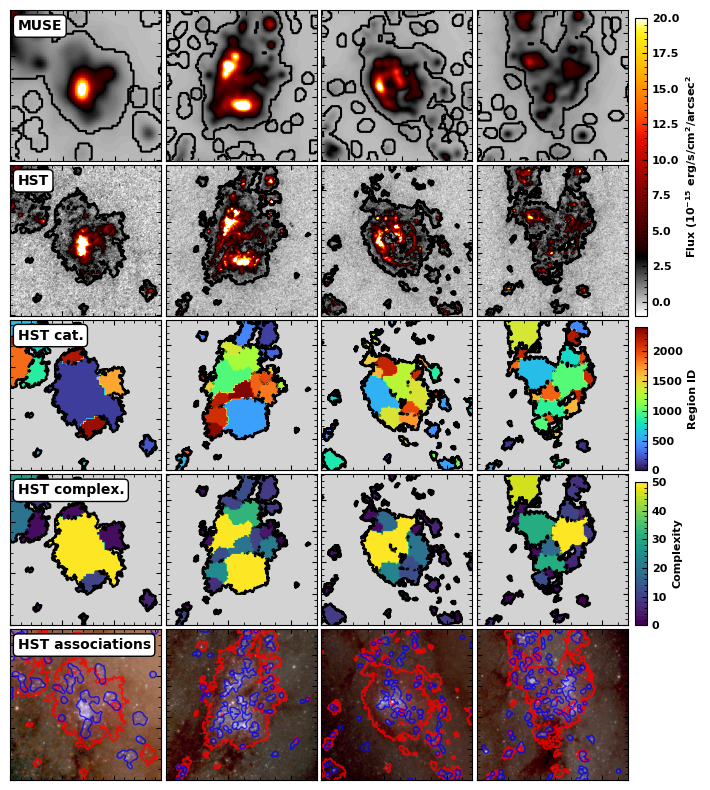

finished running


In [10]:
fig = plt.figure(figsize=(9, 10)) 
fig.subplots_adjust(wspace=-0.325, hspace=0.025)

for i in range(len(hdu_mus_crop)):
    
    data_rgb = get_rgb(data_r = hdu_hst_f814w_crop[i].data,
                        data_g = hdu_hst_f555w_crop[i].data,
                        data_b = hdu_hst_f438w_crop[i].data,
                        data_b1 = hdu_hst_f336w_crop[i].data,
                        min_max_r=[0.5, 99.99], gamma_r=1.0, 
                        min_max_g=[0.5, 99.99], gamma_g=1.0, 
                        min_max_b=[0.5, 99.99], gamma_b=1.0, 
                        min_max_b1=[90, 99.99], gamma_b1=1.0,
                        gamma_rgb=2.5)

    centre_x = centres_x[i]
    centre_y = centres_y[i]
    width = widths[i]
    height = heights[i]

    j = i+1

    ax1 = fig.add_subplot(5,n,j)
    ax2 = fig.add_subplot(5,n,j+n)
    ax3 = fig.add_subplot(5,n,j+(2*n))
    ax4 = fig.add_subplot(5,n,j+(3*n))
    ax5 = fig.add_subplot(5,n,j+(4*n))

    vmin1, vmax1 = np.nanpercentile(hdu_mus.data, [1, 99.95])
    vmin3, vmax3 = np.nanpercentile(hdu_muscat.data, [0,100])
    vmin5, vmax5 = np.nanpercentile(hdu_hstcpx_crop[i].data, [0,100])

    ax1.contour(hdu_muscat_crop[i].data, [0], origin='lower', colors='black', linewidths=1.5, extent=[0, hdu_mus_crop[i].data.shape[0], 0, hdu_mus_crop[i].data.shape[1]])
    ax2.contour(hdu_hstcat_crop[i].data, [0], origin='lower', colors='black', linewidths=1.5)
    ax3.contour(hdu_hstcat_crop[i].data, [0], origin='lower', colors='black', linewidths=1.5)
    ax4.contour(hdu_hstcat_crop[i].data, [0], origin='lower', colors='black', linewidths=1.5)

    ax5.contourf(hdu_hstcat_crop[i].data, [0, 1e5], origin='lower', colors='red', linewidths=0, alpha=0.1)
    ax5.contour(hdu_hstcat_crop[i].data, [0], origin='lower', colors='red', linewidths=1, alpha=0.75)
    ax5.contourf(hdu_hst_asscat_crop[i].data, [1, 1e5], origin='lower', colors='blue', linewidths=0, alpha=0.1)
    ax5.contour(hdu_hst_asscat_crop[i].data, [-1], origin='lower', colors='blue', linewidths=1, alpha=0.75)

    im1 = ax1.imshow(hdu_mus_crop[i].data, cmap=cmap_map, vmin=-1, vmax=20, origin='lower')
    im2 = ax2.imshow(hdu_hst_crop[i].data, cmap=cmap_map, vmin=-1, vmax=20, origin='lower')
    im3 = ax3.imshow(hdu_hstcat_crop[i].data, cmap=cmap_cat, vmin=0, vmax=vmax3, origin='lower')
    im4 = ax4.imshow(hdu_hstcpx_crop[i].data, cmap=cmap_cpx, vmin=0, vmax=50, origin='lower')
    im5 = ax5.imshow(data_rgb, origin='lower')

    for ax in [ax1, ax2, ax3, ax4, ax5]: 

        ax.set_xticklabels([])
        ax.set_yticklabels([])

    if i == 0:
        ax1.text(0.05, 0.94, 'MUSE', transform=ax1.transAxes, color='black', bbox=dict(facecolor='white', boxstyle='round', alpha=1), size=10, ha='left', va='top')
        ax2.text(0.05, 0.94, 'HST', transform=ax2.transAxes, color='black', bbox=dict(facecolor='white', boxstyle='round', alpha=1), size=10, ha='left', va='top')
        ax3.text(0.05, 0.94, 'HST cat.', transform=ax3.transAxes, color='black', bbox=dict(facecolor='white', boxstyle='round', alpha=1), size=10, ha='left', va='top')
        ax4.text(0.05, 0.94, 'HST complex.', transform=ax4.transAxes, color='black', bbox=dict(facecolor='white', boxstyle='round', alpha=1), size=10, ha='left', va='top')
        ax5.text(0.05, 0.94, 'HST associations', transform=ax5.transAxes, color='black', bbox=dict(facecolor='white', boxstyle='round', alpha=1), size=10, ha='left', va='top')
        
    if i == n-1: 

        pos1 = ax1.get_position()
        pos2 = ax2.get_position()
        cax = fig.add_axes([pos2.x1+pos2.width*0.05, pos2.y0, pos2.width*0.075, pos1.y1-pos2.y0-pos2.height*0.05])
        cbar = fig.colorbar(im1, cax=cax, orientation='vertical')
        cbar.set_label('Flux ($10^{-15}$ erg/s/cm$^2$/arcsec$^2$', fontsize=8)
        cbar.ax.tick_params(axis='both', which='major', labelsize=8)

        pos = ax3.get_position()
        cax = fig.add_axes([pos.x1+pos.width*0.05, pos.y0, pos.width*0.075, pos.height-pos.height*0.05])
        cbar = fig.colorbar(im3, cax=cax, orientation='vertical')
        cbar.set_label('Region ID', fontsize=8)
        cbar.ax.tick_params(axis='both', which='major', labelsize=8)

        pos = ax4.get_position()
        cax = fig.add_axes([pos.x1+pos.width*0.05, pos.y0, pos.width*0.075, pos.height-pos.height*0.05])
        cbar = fig.colorbar(im4, cax=cax, orientation='vertical')
        cbar.set_label('Complexity', fontsize=8)
        cbar.ax.tick_params(axis='both', which='major', labelsize=8)
        
plt.show()
print('finished running')

finished running


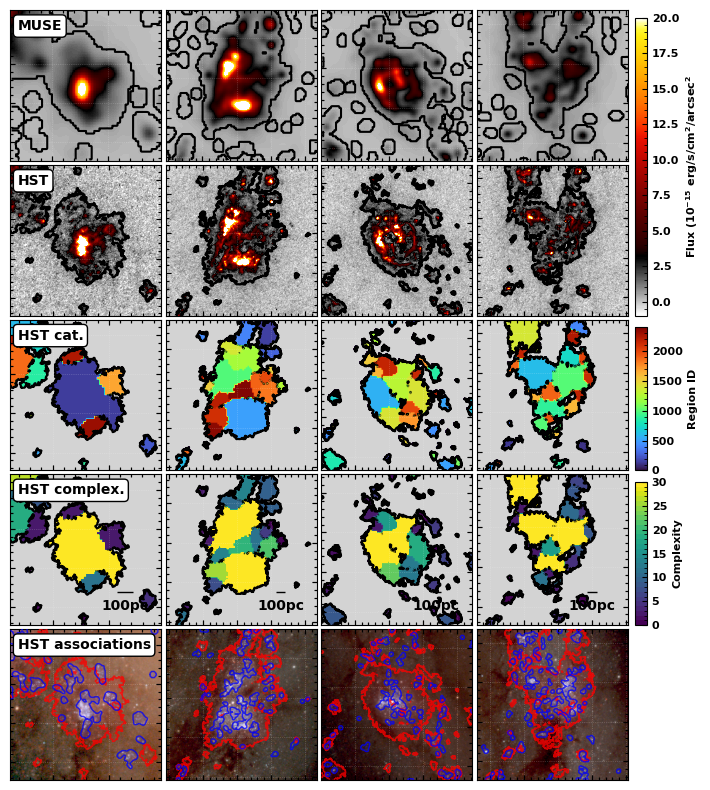

In [12]:
fig = plt.figure(figsize=(9, 10)) 
fig.subplots_adjust(wspace=-0.325, hspace=0.025)

for i in range(len(hdu_mus_crop)):

    data_rgb = get_rgb(data_r = hdu_hst_f814w_crop[i].data,
                        data_g = hdu_hst_f555w_crop[i].data,
                        data_b = hdu_hst_f438w_crop[i].data,
                        data_b1 = hdu_hst_f336w_crop[i].data,
                        min_max_r=[0.5, 99.99], gamma_r=1.0, 
                        min_max_g=[0.5, 99.99], gamma_g=1.0, 
                        min_max_b=[0.5, 99.99], gamma_b=1.0, 
                        min_max_b1=[90, 99.99], gamma_b1=1.0,
                        gamma_rgb=2.5)

    centre_x = centres_x[i]
    centre_y = centres_y[i]
    width = widths[i]
    height = heights[i]

    j = i+1

    ax1 = fig.add_subplot(5,n,j, projection=WCS(hdu_mus_crop[i].header))
    ax2 = fig.add_subplot(5,n,j+n, projection=WCS(hdu_hst_crop[i].header))
    ax3 = fig.add_subplot(5,n,j+(2*n), projection=WCS(hdu_hstcat_crop[i].header))
    ax4 = fig.add_subplot(5,n,j+(3*n), projection=WCS(hdu_hstcpx_crop[i].header))
    ax5 = fig.add_subplot(5,n,j+(4*n), projection=WCS(hdu_hst_f814w_crop[i].header))

    vmin1, vmax1 = np.nanpercentile(hdu_mus.data, [1, 99.95])
    vmin3, vmax3 = np.nanpercentile(hdu_muscat.data, [0,100])
    vmin5, vmax5 = np.nanpercentile(hdu_hstcpx_crop[i].data, [0,100])

    ax1.contour(hdu_muscat_crop[i].data, [0], origin='lower', colors='black', linewidths=1.5, extent=[0, hdu_mus_crop[i].data.shape[0], 0, hdu_mus_crop[i].data.shape[1]])
    ax2.contour(hdu_hstcat_crop[i].data, [0], origin='lower', colors='black', linewidths=1.5)
    ax3.contour(hdu_hstcat_crop[i].data, [0], origin='lower', colors='black', linewidths=1.5)
    ax4.contour(hdu_hstcat_crop[i].data, [0], origin='lower', colors='black', linewidths=1.5)

    ax5.contourf(hdu_hstcat_crop[i].data, [0, 1e5], origin='lower', colors='red', linewidths=0, alpha=0.1)
    ax5.contour(hdu_hstcat_crop[i].data, [0], origin='lower', colors='red', linewidths=1, alpha=0.75)
    ax5.contourf(hdu_hst_asscat_crop[i].data, [1, 1e5], origin='lower', colors='blue', linewidths=0, alpha=0.1)
    ax5.contour(hdu_hst_asscat_crop[i].data, [-1], origin='lower', colors='blue', linewidths=1, alpha=0.75)

    im1 = ax1.imshow(hdu_mus_crop[i].data, cmap=cmap_map, vmin=-1, vmax=20, origin='lower')
    im2 = ax2.imshow(hdu_hst_crop[i].data, cmap=cmap_map, vmin=-1, vmax=20, origin='lower')
    im3 = ax3.imshow(hdu_hstcat_crop[i].data, cmap=cmap_cat, vmin=0, vmax=vmax3, origin='lower')
    im4 = ax4.imshow(hdu_hstcpx_crop[i].data, cmap=cmap_cpx, vmin=0, vmax=30, origin='lower')
    im5 = ax5.imshow(data_rgb, origin='lower')

    for ax in [ax1, ax2, ax3, ax4, ax5]: 

        ax.set_xticklabels([])
        ax.set_yticklabels([])

        ax.tick_params(axis='x', which='both', bottom=True, top=True, left=True, right=True)
        ax.tick_params(axis='y', which='both', bottom=True, top=True, left=True, right=True)
        ax.tick_params(axis='x', labelbottom=False, labelleft=False, labelright=False, labeltop=False)
        ax.tick_params(axis='y', labelbottom=False, labelleft=False, labelright=False, labeltop=False)
        ax.grid(True, color='white', linestyle=':', linewidth=0.5, alpha=0.3)

        ra = ax.coords[0]
        dec = ax.coords[1]

        ra.display_minor_ticks(True)
        dec.display_minor_ticks(True)

    if i == 0:
        ax1.text(0.05, 0.94, 'MUSE', transform=ax1.transAxes, color='black', bbox=dict(facecolor='white', boxstyle='round', alpha=1), size=10, ha='left', va='top')
        ax2.text(0.05, 0.94, 'HST', transform=ax2.transAxes, color='black', bbox=dict(facecolor='white', boxstyle='round', alpha=1), size=10, ha='left', va='top')
        ax3.text(0.05, 0.94, 'HST cat.', transform=ax3.transAxes, color='black', bbox=dict(facecolor='white', boxstyle='round', alpha=1), size=10, ha='left', va='top')
        ax4.text(0.05, 0.94, 'HST complex.', transform=ax4.transAxes, color='black', bbox=dict(facecolor='white', boxstyle='round', alpha=1), size=10, ha='left', va='top')
        ax5.text(0.05, 0.94, 'HST associations', transform=ax5.transAxes, color='black', bbox=dict(facecolor='white', boxstyle='round', alpha=1), size=10, ha='left', va='top')

    wcsaxes.add_scalebar(ax4, (100/(17.7e6/206265)*u.arcsec).to('deg'), corner='bottom right', label='100pc')

    if i == n-1: 

        pos1 = ax1.get_position()
        pos2 = ax2.get_position()
        cax = fig.add_axes([pos2.x1+pos2.width*0.05, pos2.y0, pos2.width*0.075, pos1.y1-pos2.y0-pos2.height*0.05])
        cbar = fig.colorbar(im1, cax=cax, orientation='vertical')
        cbar.set_label('Flux ($10^{-15}$ erg/s/cm$^2$/arcsec$^2$', fontsize=8)
        cbar.ax.tick_params(axis='both', which='major', labelsize=8)

        pos = ax3.get_position()
        cax = fig.add_axes([pos.x1+pos.width*0.05, pos.y0, pos.width*0.075, pos.height-pos.height*0.05])
        cbar = fig.colorbar(im3, cax=cax, orientation='vertical')
        cbar.set_label('Region ID', fontsize=8)
        cbar.ax.tick_params(axis='both', which='major', labelsize=8)

        pos = ax4.get_position()
        cax = fig.add_axes([pos.x1+pos.width*0.05, pos.y0, pos.width*0.075, pos.height-pos.height*0.05])
        cbar = fig.colorbar(im4, cax=cax, orientation='vertical')
        cbar.set_label('Complexity', fontsize=8)
        cbar.ax.tick_params(axis='both', which='major', labelsize=8)
        
print('finished running')
plt.savefig('./figs/maps_hstmuse_ngc1566_zoom_complex.pdf', dpi=150, bbox_inches='tight', transparent=True)